# Motive

* Identify fraudulent credit card transactions.
* to find new methods for fraud detection and to increase the accuracy of results.
* to detect the credit card fraud in the dataset obtained from ULB by applying Logistic regression, Decision tree to evaluate their   Accuracy, sensitivity, specificity, precision using different models and compare and collate them to state the best possible model   to solve the credit card fraud detection problem.

# Challenges Involved

Credit card fraud detection is:
* One of the most explored domains of fraud detection
* Relies on the automatic analysis of recorded transactions


The main challenges in credit card fraud detection are:
* Huge size of data
* Imbalanced dataset
* Availability of data

# Dataset

* The datasets contains transactions made by credit cards in September 2013 by european cardholders.
* This dataset presents transactions that occurred in two days,where we have 492 frauds out of 284,807 transactions.
* It contains only numeric input variables which are the result of a PCA transformation.



In this kernel we will use various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()
%matplotlib inline
from pylab import rcParams

df = pd.read_csv('../input/creditcardfraud/creditcard.csv')






In [2]:
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Fraud Case and Non Fraud cases

In [6]:
fraud_cases=len(df[df['Class']==1])
print('number of fraud cases:=',fraud_cases)
Nonfraud_cases=len(df[df['Class']==0])
print('number of Nonfraud cases:=',Nonfraud_cases)

number of fraud cases:= 492
number of Nonfraud cases:= 284315


In [7]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [8]:
## Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]

normal = df[df['Class']==0]

LABELS=['Normal','Fraud']

**Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!
**



Let's check data unbalance with respect with target value, i.e. Class.


Text(0, 0.5, 'frequency')

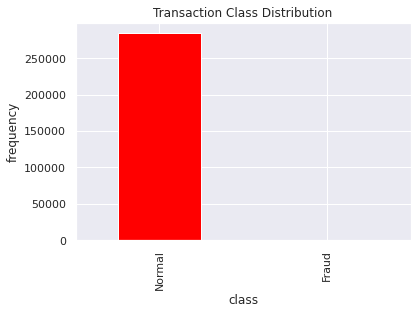

In [9]:
count_classes=pd.value_counts(df['Class'],sort=True)
count_classes.plot(kind='bar',color='red')
plt.title('Transaction Class Distribution')
plt.xticks(range(2),LABELS)
plt.xlabel('class')
plt.ylabel('frequency')

We need to analyze more amount of information from the transaction data
How different are the amount of money used in different transaction classes?

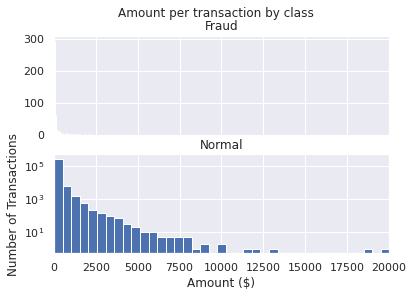

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

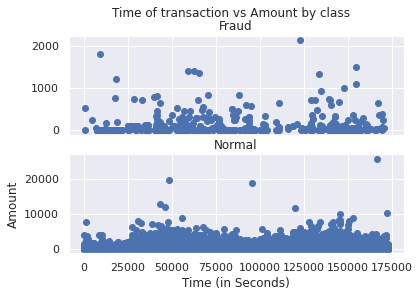

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [12]:
x=df.drop('Class',axis=1)
y=df['Class']

# LOGISTIC REGRESSION ON ORIGINAL DATA(Imbalanced Data)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)


In [14]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
y_pred

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 0, 0, 0])

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.9989466661985184

# Performing Sampling Technique to balance the data
 
Random Oversampling: Randomly duplicate examples in the minority class. Random Undersampling: Randomly delete examples in the majority class.

random under sampling:
1    492
0    492
Name: Class, dtype: int64


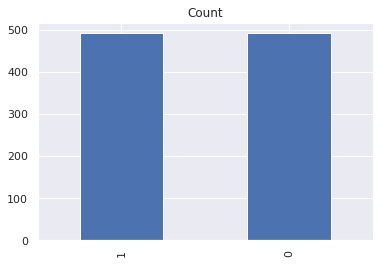

In [16]:
#Random UnderSampling
normal_under=normal.sample(fraud_cases)
under_sample=pd.concat([normal_under,fraud],axis=0)
print('random under sampling:')
print(under_sample.Class.value_counts())
under_sample.Class.value_counts().plot(kind='bar',title='Count')

random under sampling:
1    284315
0    284315
Name: Class, dtype: int64


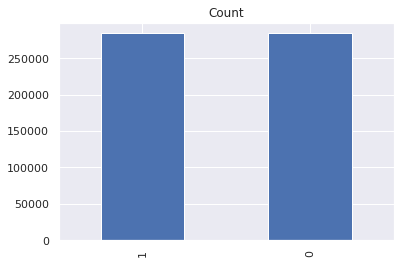

In [17]:
#Random OverSampling
fraud_over=fraud.sample(Nonfraud_cases,replace=True)
over_sample=pd.concat([fraud_over,normal],axis=0)
print('random under sampling:')
print(over_sample.Class.value_counts())
over_sample.Class.value_counts().plot(kind='bar',title='Count')

In [18]:
over_sample.head()
X=over_sample.drop('Class',axis=1)
Y=over_sample['Class']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2)

# LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred_log=log.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score

print('Accuracy:',accuracy_score(y_test,y_pred_log))
print('Precision:',precision_score(y_test,y_pred_log))
print('Recall:',recall_score(y_test,y_pred_log))
print('F1 score:',f1_score(y_test,y_pred_log))

Accuracy: 0.9168967518421469
Precision: 0.9520905423748256
Recall: 0.8776125189440666
F1 score: 0.913335717495163


Confusion Matrix:
 [[54474  2506]
 [ 6945 49801]]


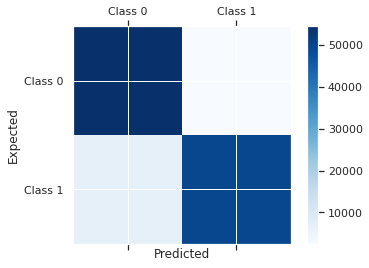

In [20]:
conf_mat_log=confusion_matrix(y_test, y_pred_log)
print('Confusion Matrix:\n',conf_mat_log)

labels=['Class 0','Class 1']
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(conf_mat_log,cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Naive Bayes Classifier

In [21]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(x_train,y_train)
y_pred_nv=nv.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred_nv))

Accuracy: 0.8651847422752933
